**MOVIES DATASET**

8 veri dosyasından oluşmaktadır. 


In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the  movies dataset csv files

countries = pd.read_csv('countries.csv',lineterminator='\n')
actors = pd.read_csv('actors.csv',lineterminator='\n')
genres = pd.read_csv('genres.csv',lineterminator='\n')
languages = pd.read_csv('languages.csv',lineterminator='\n')
movies = pd.read_csv('movies.csv',lineterminator='\n')
movies2actors=pd.read_csv('movies2actors.csv',on_bad_lines='skip')#lineterminator ile çözülmedi
prodcompanies = pd.read_csv('prodcompanies.csv',lineterminator='\n')
ratings=pd.read_csv('ratings.csv',lineterminator='\n')

#datasetlerin bozulmaması için hepsinin kopyaları ile işlemleri yaptım
df_movies=movies.copy()
df_countries=countries.copy()
df_actors=actors.copy()
df_genres=genres.copy()
df_languages=languages.copy()
df_movies2actors=movies2actors.copy()
df_prodcompanies=prodcompanies.copy()
df_ratings=ratings.copy()

In [3]:
# Buketin tavsiyesi ile veri setine ilk bakışları fonksiyonel bir şekilde gerçekleştirmeyi sağlayacak bir fonksiyon tanımladım.

def check_df(dataframe, head=5):

    # boyut bilgisi
    print("#"*50," Shape ","#"*50)
    print(dataframe.shape)

    # tip bilgisi
    print("#"*50," Types ","#"*50)
    print(dataframe.dtypes)

    #Baştan gözlemleyelim
    print("#"*50," Head ","#"*50)
    print(dataframe.head(head))

    #Sondan gözlemleyelim
    print("\n","#"*50,"Tail","#"*50)
    print(dataframe.tail(head))

    #Veri setinde herhangi bir eksik değer var mı bakalım
    print("#"*50," NA ","#"*50)
    print(dataframe.isnull().sum())


Şimdi sırayla datasetlerimize göz atalım.

### **actors tablomuz**

In [4]:
check_df(df_actors)

##################################################  Shape  ##################################################
(98690, 3)
##################################################  Types  ##################################################
actorid     int64
name       object
sex        object
dtype: object
##################################################  Head  ##################################################
   actorid                  name sex
0        4            $hort, Too   M
1       16    'Bear'Boyd, Steven   M
2       28  'Dead End' Kids, The   M
3      566        Aaby, Kristian   M
4      580                 Aadil   M

 ################################################## Tail ##################################################
       actorid                   name sex
98685  2749162          Ôshima, Akiyo   F
98686  2749168         Ôshima, Yukari   F
98687  2749204            Ôtani, Ikue   F
98688  2749377  Örnólfsdóttir, Álfrún   F
98689  2749386             Öss, Eniko   F
#########

sütun isimlerimizi değiştirelim

In [5]:
df_actors.rename(columns= {'actorid':'aktor_id','name':'aktor_ismi','sex':'cinsiyet'},inplace = True)
df_actors.head()

,aktor_id,aktor_ismi,cinsiyet
0,4,"$hort, Too",M
1,16,"'Bear'Boyd, Steven",M
2,28,"'Dead End' Kids, The",M
3,566,"Aaby, Kristian",M
4,580,Aadil,M


 
Burada gördüğümüz üzere datasetimizde null değer yok ama aktör isimlerinde noktalama işaretleri farklı karakterler vs var datasetimizi daha okunaklı hale getirmek için karakterleri değiştirelim ve isim sütununu küçük harfe çevirelim bu işlemi diğer datasetlerde de yapma ihtiyacımız olacağını düşünerek bir replace_characters isimli bir fonksiyon tanımladım

In [6]:
#karakter değişimi
replaceCharacters={'ş':'s','$':'s','ı':'i','ö':'o','ğ':'g','ç':'c','ü':'u','İ':'i','Á':'a','ú':'u','ó':'o','ô':'o','á':'a','ậ':'a','ư':'u','ơ':'o','ậ':'a','ư':'u','ơ':'o','ñ':'n'}
def replace_characters(text):
  new_text=text.lower().translate(text.maketrans(replaceCharacters))
  return new_text
#df["text"]=df.text.apply(replace_characters) şeklinde kullanılır

In [7]:
df_actors["aktor_ismi"]=df_actors.aktor_ismi.apply(replace_characters)
df_actors.head()

,aktor_id,aktor_ismi,cinsiyet
0,4,"short, too",M
1,16,"'bear'boyd, steven",M
2,28,"'dead end' kids, the",M
3,566,"aaby, kristian",M
4,580,aadil,M


In [8]:
#noktalama işaretlerini kaldırma
def remove_punctuation(text):
  new_text = text.translate(text.maketrans(" "," ", string.punctuation))
  return new_text
#df["text2"] = df.text.apply(remove_punctuation)

In [9]:
df_actors["aktor_ismi"]=df_actors.aktor_ismi.apply(remove_punctuation)
df_actors.sort_values('aktor_id')

,aktor_id,aktor_ismi,cinsiyet
0,4,short too,M
1,16,bearboyd steven,M
2,28,dead end kids the,M
3,566,aaby kristian,M
4,580,aadil,M
...,...,...,...
98685,2749162,oshima akiyo,F
98686,2749168,oshima yukari,F
98687,2749204,otani ikue,F
98688,2749377,ornolfsdottir alfrun,F


### **countries tablomuz**

In [10]:
check_df(df_countries)

##################################################  Shape  ##################################################
(5007, 2)
##################################################  Types  ##################################################
movieid     int64
country    object
dtype: object
##################################################  Head  ##################################################
   movieid    country
0  1672052  Australia
1  1672111  Australia
2  1672111        USA
3  1672580        USA
4  1672716        USA

 ################################################## Tail ##################################################
      movieid  country
5002  2593112  Germany
5003  2593112  Iceland
5004  2593112    Japan
5005  2593112      USA
5006  2593313    Spain
##################################################  NA  ##################################################
movieid    0
country    0
dtype: int64


sütun isimlerini değiştirelim

In [11]:
df_countries.rename(columns= {'movieid':'film_id','country':'ulke'},inplace = True)
df_countries.head()

,film_id,ulke
0,1672052,Australia
1,1672111,Australia
2,1672111,USA
3,1672580,USA
4,1672716,USA


In [12]:
df_countries["ulke"]=df_countries.ulke.apply(replace_characters)


In [13]:
df_countries.sort_values('ulke').head()

,film_id,ulke
3251,2318736,algeria
766,1809431,argentina
1754,2005280,argentina
4477,2484082,argentina
1009,1854918,argentina


# **genres tablosu**

In [14]:
check_df(df_genres)

##################################################  Shape  ##################################################
(9940, 2)
##################################################  Types  ##################################################
movieid     int64
genre      object
dtype: object
##################################################  Head  ##################################################
   movieid      genre
0  1672052      Drama
1  1672052    History
2  1672052        War
3  1672111     Action
4  1672111  Adventure

 ################################################## Tail ##################################################
      movieid    genre
9935  2593112  Mystery
9936  2593313   Comedy
9937  2593313    Crime
9938  2593313    Drama
9939  2593313  Romance
##################################################  NA  ##################################################
movieid    0
genre      0
dtype: int64


sütun ismi değiştirme

In [15]:
df_genres.rename(columns= {'movieid':'film_id','genre':'tur'},inplace = True)
df_genres.head()

,film_id,tur
0,1672052,Drama
1,1672052,History
2,1672052,War
3,1672111,Action
4,1672111,Adventure


In [16]:
df_genres['tur']=df_genres.tur.apply(replace_characters)

In [17]:
df_genres.sort_values('film_id').head()

,film_id,tur
0,1672052,drama
1,1672052,history
2,1672052,war
3,1672111,action
4,1672111,adventure


film id ye sıraladığımızda bir filmin birden fazla türe girdiğini görüyoruz

###**languages tablosu**

In [18]:
check_df(df_languages)

##################################################  Shape  ##################################################
(4976, 2)
##################################################  Types  ##################################################
movieid      int64
language    object
dtype: object
##################################################  Head  ##################################################
   movieid   language
0  1672052  Afrikaans
1  1672052    English
2  1672111    English
3  1672580    English
4  1672716    English

 ################################################## Tail ##################################################
      movieid   language
4971  2593112    English
4972  2593112     German
4973  2593112  Icelandic
4974  2593112   Japanese
4975  2593313    Spanish
##################################################  NA  ##################################################
movieid     0
language    0
dtype: int64


sütun isimlerini değiştirelim ve metinleri düzeltelim

In [19]:
df_languages.rename(columns= {'movieid':'film_id','language':'dil'},inplace = True)
df_languages.head()

,film_id,dil
0,1672052,Afrikaans
1,1672052,English
2,1672111,English
3,1672580,English
4,1672716,English


In [20]:
df_languages['dil']=df_languages.dil.apply(replace_characters)
df_languages["dil"]=df_languages.dil.apply(remove_punctuation)

In [21]:
df_languages.sort_values('dil').head()

,film_id,dil
4805,2554996,aboriginal yolngu languages
0,1672052,afrikaans
2203,2124357,afrikaans
3922,2437320,afrikaans
3925,2437321,afrikaans


# **movies tablosu**

In [22]:
check_df(df_movies)

##################################################  Shape  ##################################################
(3832, 3)
##################################################  Types  ##################################################
movieid     int64
title      object
year        int64
dtype: object
##################################################  Head  ##################################################
   movieid                          title  year
0  1672052        'Breaker' Morant (1980)  1980
1  1672111   'Crocodile' Dundee II (1988)  1988
2  1672580      'Til There Was You (1997)  1997
3  1672716          'night, Mother (1986)  1986
4  1672946  ...And Justice for All (2014)  2014

 ################################################## Tail ##################################################
      movieid                     title  year
3827  2591814           eXistenZ (1999)  1999
3828  2592334     ¡Three Amigos! (1986)  1986
3829  2592963  À nous la liberté (1931)  1931
3830  259311

In [23]:
df_movies.rename(columns= {'movieid':'film_id','title':'film_ismi','year':'yil'},inplace = True)
df_movies.head()

,film_id,film_ismi,yil
0,1672052,'Breaker' Morant (1980),1980
1,1672111,'Crocodile' Dundee II (1988),1988
2,1672580,'Til There Was You (1997),1997
3,1672716,"'night, Mother (1986)",1986
4,1672946,...And Justice for All (2014),2014


In [24]:
#film ismi sutunundaki verileri temizledijk
df_movies['film_ismi']=df_movies.film_ismi.apply(replace_characters)
df_movies['film_ismi']=df_movies.film_ismi.apply(remove_punctuation).str.replace('\d', '',regex=True)
#title içindeki () ve ' gibi noktalamaları ve yanındaki sayılarısilelim bu kısım olmadan çalışmadı .str.replace('\d', '',regex=True)
df_movies.head()

,film_id,film_ismi,yil
0,1672052,breaker morant,1980
1,1672111,crocodile dundee ii,1988
2,1672580,til there was you,1997
3,1672716,night mother,1986
4,1672946,and justice for all,2014


In [25]:
df_movies.sort_values('yil')

,film_id,film_ismi,yil
3184,2452309,the lodger,1898
13,1677472,leagues under the sea,1905
1242,1984751,hamlet,1907
3297,2465823,the pawnbroker,1908
2159,2238465,othello,1909
...,...,...,...
1497,2046051,jacobs ladder,2012
2745,2384304,supernova,2012
2377,2298189,rentacop,2012
3473,2488375,the underneath,2013


### **movies2actors tablosu**

In [26]:
check_df(df_movies2actors)

##################################################  Shape  ##################################################
(138342, 4)
##################################################  Types  ##################################################
movieid          int64
actorid          int64
as_character    object
leading          int64
dtype: object
##################################################  Head  ##################################################
   movieid  actorid                       as_character  leading
0  1672052    88796             [Court reporter]  <20>       20
1  1672052    88848  [Col. Ian 'Johnny' Hamilton]  <7>        7
2  1672052   121878                   [Lt. Reed]  <21>       21
3  1672052   134348                 [Large Boer]  <41>       41
4  1672052   198682          [Lt. Peter Handcock]  <4>        4

 ################################################## Tail ##################################################
        movieid  actorid             as_character  leading
1

burda ilk gördüğümüz şey as_character sütununda 857 null değerin olması eğer null değerler kalırsa ve silinirse olarak 2 şekilde denemeyi düşündüm ancak verileri temizlerken hata aldım ve silmeye karar verdiim
fillna() ile nullar doldurulabilirmiş ama nasıl bak!

ben leadingi karakterin göründüğü sahne sayısı olarak aldım

In [27]:
df_movies2actors.rename(columns= {'movieid':'film_id','actorid':'aktor_id','as_character':'canlandirilan_karakter','leading':'gorundugu_sahne_sayisi'},inplace = True)
df_movies2actors.head()

,film_id,aktor_id,canlandirilan_karakter,gorundugu_sahne_sayisi
0,1672052,88796,[Court reporter] <20>,20
1,1672052,88848,[Col. Ian 'Johnny' Hamilton] <7>,7
2,1672052,121878,[Lt. Reed] <21>,21
3,1672052,134348,[Large Boer] <41>,41
4,1672052,198682,[Lt. Peter Handcock] <4>,4


In [28]:
#Null/Nan değerlerin silinmesi
print("İşlem yapılmadan önce toplam NaN değeri: ", pd.isnull(df_movies2actors.canlandirilan_karakter).sum())
print("Toplam satır sayısı: ", df_movies2actors.shape[0])

df_movies2actors.dropna(how="any",inplace=True)

print("İşlem yapıldıktan sonra toplam NaN değeri: ", pd.isnull(df_movies2actors.canlandirilan_karakter).sum())
print("Toplam satır sayısı: ", df_movies2actors.shape[0])

İşlem yapılmadan önce toplam NaN değeri:  857
Toplam satır sayısı:  138342
İşlem yapıldıktan sonra toplam NaN değeri:  0
Toplam satır sayısı:  137485


In [29]:
#canlandirilan_karakter sutunundaki verileri temizledijk
df_movies2actors['canlandirilan_karakter']=df_movies2actors.canlandirilan_karakter.apply(replace_characters)
df_movies2actors['canlandirilan_karakter']=df_movies2actors.canlandirilan_karakter.apply(remove_punctuation).str.replace('\d', '',regex=True)
df_movies2actors.head()

,film_id,aktor_id,canlandirilan_karakter,gorundugu_sahne_sayisi
0,1672052,88796,court reporter,20
1,1672052,88848,col ian johnny hamilton,7
2,1672052,121878,lt reed,21
3,1672052,134348,large boer,41
4,1672052,198682,lt peter handcock,4


In [30]:
df_movies2actors.sort_values('gorundugu_sahne_sayisi',ascending=False).head()


,film_id,aktor_id,canlandirilan_karakter,gorundugu_sahne_sayisi
66930,2153014,366939,voice eulogy performer,307
67020,2153014,984506,soweto teacher,306
67007,2153014,867732,the judge,305
66909,2153014,179706,captain green,304
67133,2153014,1788058,miss dunne,303


aktör tablosundaki toplam kadın ve erkek sayısını görelim
df_actors.groupby("sex").size()

# **prodcompanies tablosu**

In [31]:
check_df(df_prodcompanies)

##################################################  Shape  ##################################################
(9843, 2)
##################################################  Types  ##################################################
movieid     int64
name       object
dtype: object
##################################################  Head  ##################################################
   movieid                                         name
0  1672052                               7 Network [au]
1  1672052         Australian Film Commission, The [au]
2  1672052                             Pact Productions
3  1672052  South Australian Film Corporation, The [au]
4  1672111                      Paramount Pictures [us]

 ################################################## Tail ##################################################
      movieid                                            name
9838  2593112                                          Icicle
9839  2593112   Pandora Filmproduktion [de

In [32]:
df_prodcompanies.rename(columns= {'movieid':'film_id','name':'sirket_ismi'},inplace = True)
df_prodcompanies.head()

,film_id,sirket_ismi
0,1672052,7 Network [au]
1,1672052,"Australian Film Commission, The [au]"
2,1672052,Pact Productions
3,1672052,"South Australian Film Corporation, The [au]"
4,1672111,Paramount Pictures [us]


In [33]:
df_prodcompanies['sirket_ismi']=df_prodcompanies.sirket_ismi.apply(replace_characters)
df_prodcompanies['sirket_ismi']=df_prodcompanies.sirket_ismi.apply(remove_punctuation) #sondaki [ab] seklinde değerleri başka sütuna aktar veya sil
df_prodcompanies

,film_id,sirket_ismi
0,1672052,7 network au
1,1672052,australian film commission the au
2,1672052,pact productions
3,1672052,south australian film corporation the au
4,1672111,paramount pictures us
...,...,...
9838,2593112,icicle
9839,2593112,pandora filmproduktion de coproduction
9840,2593112,sunrise jp coproduction
9841,2593112,zentropa entertainments dk coproduction


In [34]:
df_prodcompanies.sort_values('film_id').head()

,film_id,sirket_ismi
0,1672052,7 network au
1,1672052,australian film commission the au
2,1672052,pact productions
3,1672052,south australian film corporation the au
4,1672111,paramount pictures us


# **ratings tablosu**

In [35]:
check_df(df_ratings)

##################################################  Shape  ##################################################
(3773, 4)
##################################################  Types  ##################################################
movieid           int64
rank            float64
votes           float64
distribution     object
dtype: object
##################################################  Head  ##################################################
   movieid  rank    votes distribution
0  1672052   7.8   8111.0   0000001222
1  1672111   5.3  32183.0   0001221000
2  1672580   4.4   1894.0   0011110000
3  1672716   7.0   1255.0   0000001212
4  1673647   6.5    128.0   0000111211

 ################################################## Tail ##################################################
      movieid  rank    votes distribution
3768  2591814   6.8  56563.0   0000012210
3769  2592334   6.2  36951.0   0000122100
3770  2592963   7.6   2294.0   0000002311
3771  2593112   6.9   1231.0   000001221


distributiondaki baştaki 0ları kaldırdım
votes ksımında .0ı kaldırdım

In [36]:
df_ratings.rename(columns= {'movieid':'film_id','rank':'puan','votes':'oy_sayisi','distribution':'dagitim_sayisi'},inplace = True)
df_ratings.head()

,film_id,puan,oy_sayisi,dagitim_sayisi
0,1672052,7.8,8111.0,0000001222
1,1672111,5.3,32183.0,0001221000
2,1672580,4.4,1894.0,0011110000
3,1672716,7.0,1255.0,0000001212
4,1673647,6.5,128.0,0000111211


In [37]:
df_ratings['dagitim_sayisi']=df_ratings['dagitim_sayisi'].str.lstrip('0')  #baştaki sıfırları sildim
df_ratings.sort_values('puan',ascending=False)

,film_id,puan,oy_sayisi,dagitim_sayisi
3337,2477653,9.3,998823.0,125
3012,2437277,9.2,706695.0,125
1401,2024833,9.0,301575.0,124
2288,2280997,9.0,775943.0,124
3013,2437299,9.0,457100.0,124
...,...,...,...,...
1644,2109077,2.3,6244.0,4110000000
306,1756051,2.3,2298.0,4000000001
2439,2321525,2.2,6981.0,6000000001
571,1810092,2.1,4045.0,5100000001


In [38]:
print(df_ratings.describe().T)

            count          mean            std        min        25%  \
film_id    3773.0  2.153232e+06  269252.591906  1672052.0  1925449.0   
puan       3773.0  6.402968e+00       1.139101        1.8        5.7   
oy_sayisi  3771.0  2.771873e+04   63563.550897        5.0     1801.5   

                 50%        75%        max  
film_id    2173331.0  2411215.0  2593313.0  
puan             6.5        7.2        9.3  
oy_sayisi     6938.0    25559.0   998823.0  


In [39]:
#avg = df_ratings["puan"].mean()
#avg

## Analizler

### Datasetlerimizi inceleyip düzemledikten sonra analizlerimize geçelim

**1.Ülkelere göre çekilen film sayısı:**

In [40]:
df_countries.groupby('ulke').ulke.agg(['count']).sort_values('count',ascending=False)
#df_countries["ulke"].value_counts()

,count
ulke,
usa,3046
uk,549
france,334
germany,166
canada,131
...,...
chile,1
cameroon,1
bhutan,1


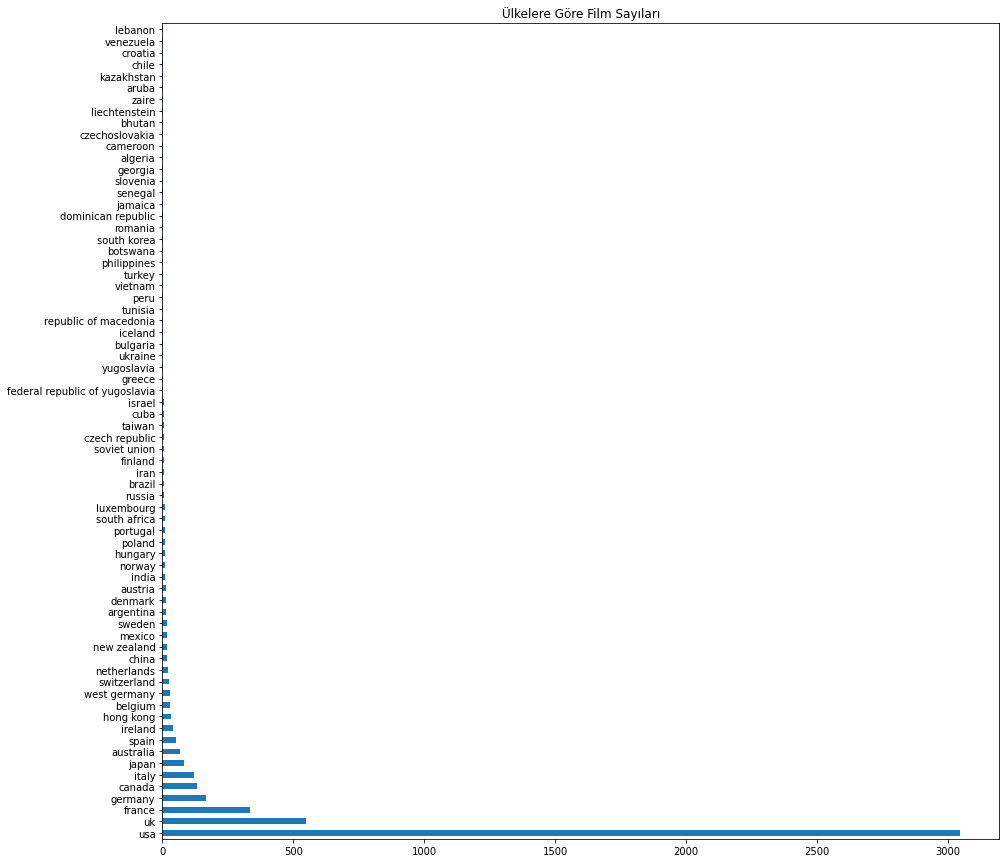

In [41]:
df_countries["ulke"].value_counts().plot.barh(figsize=(15, 15)).set_title("Ülkelere Göre Film Sayıları");

**2.Türlere göre film sayısı:**

In [42]:
df_genres.groupby("tur").tur.agg(["count"]) #duplicate olanları almadan sayalım

,count
tur,
action,539
adult,4
adventure,478
animation,105
biography,163
comedy,1447
crime,608
documentary,125
drama,2096


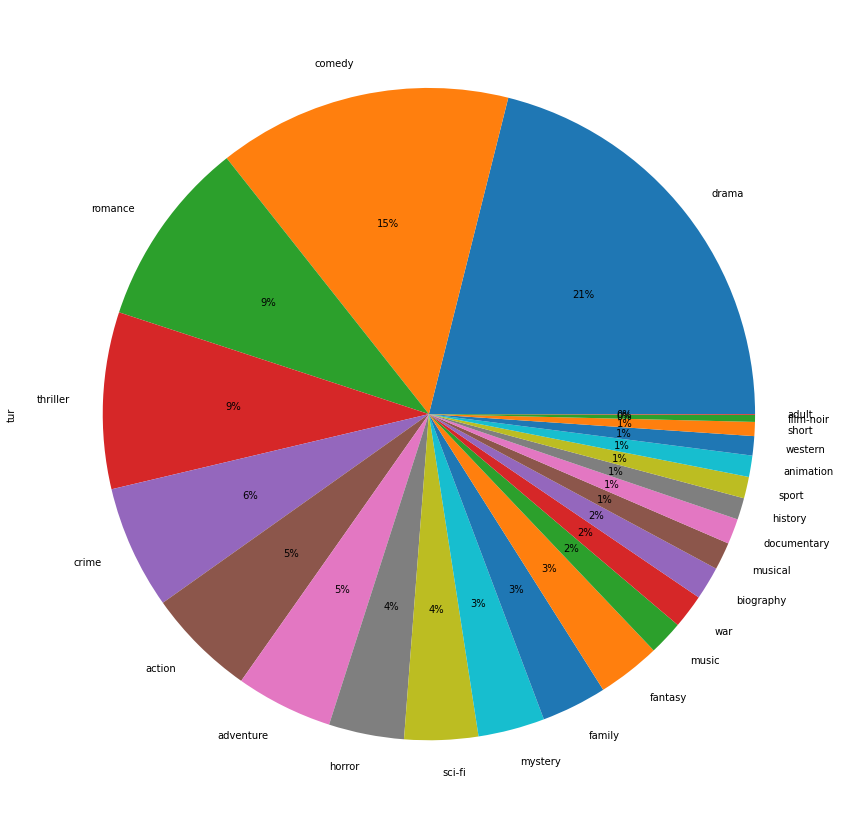

In [43]:
df_genres.tur.value_counts().plot.pie(autopct='%1.0f%%',figsize=(15, 15))

3.**Aktörlerin oynadığı film sayıları:**

In [44]:
df_actorsmerge=pd.merge(df_actors,df_movies2actors,on="aktor_id",how='outer')
df_actorsmerge.head()



,aktor_id,aktor_ismi,cinsiyet,film_id,canlandirilan_karakter,gorundugu_sahne_sayisi
0,4,short too,M,1722174.0,too short,0.0
1,4,short too,M,2168402.0,lewloc,27.0
2,4,short too,M,2301689.0,himself,0.0
3,16,bearboyd steven,M,NaN,NaN,NaN
4,28,dead end kids the,M,2496767.0,,2.0


In [45]:
df_actorsmerge.groupby(by=["aktor_id","aktor_ismi"]).aktor_id.agg(["count"]).sort_values('count',ascending=False)


,,count
aktor_id,aktor_ismi,
1694741,welker frank,51
745232,jackson samuel l,36
375938,de niro robert,33
2092485,goldberg whoopi i,31
1676554,walsh m emmet,31
...,...,...
979815,maldonado paul,1
979800,maldonado miguel i,1
979702,maldonado edwin i,1


**4.Aktörlerin oynadığı film türleri**

In [46]:
#movies2actor ve actors ve genres? birleştirip dene
df_actorsmerge=pd.merge(df_actorsmerge,df_genres,on="film_id",how='outer')
df_actorsmerge.head()
df_actorsmerge.groupby(by=["tur","aktor_ismi"]).aktor_id.agg(["count"])
df_actorsmerge.head()


,aktor_id,aktor_ismi,cinsiyet,film_id,canlandirilan_karakter,gorundugu_sahne_sayisi,tur
0,4.0,short too,M,1722174.0,too short,0.0,documentary
1,402831.0,dickson john s,M,1722174.0,as rosebudd himself,0.0,documentary
2,479268.0,fargas antonio,M,1722174.0,link brown,0.0,documentary
3,640748.0,hammond l,M,1722174.0,payroll the pimp,0.0,documentary
4,668443.0,hefner hugh m,M,1722174.0,archive footage himself,0.0,documentary


**5.Ülkelere göre hangi tür filmler çekilmiş**

In [47]:
#Birleştireceğim veri setleri içinden ilgili sütunları seçelim.

d1_5 = df_movies[["film_id"]]
d2_5 = df_countries[["film_id","ulke"  ]]
d3_5=df_genres[["film_id","tur"]]

#Verileri birleştirme
mergingCountry_df = pd.merge(d1_5,d2_5,how='right')
mergingCountry_df=pd.merge(mergingCountry_df,d3_5,how='right')

#mergingdf 
df_country=mergingCountry_df.groupby(by=["tur","ulke"]).ulke.agg(["count"])
df_country.head()

count
tur    ulke            
action argentina      1
       aruba          1
       australia     13
       austria        1
       belgium        1

**6.Kadın-Erkek Aktör Sayısı**

In [48]:
df_actors.groupby("cinsiyet").size()

cinsiyet
F    32896
M    65794
dtype: int64

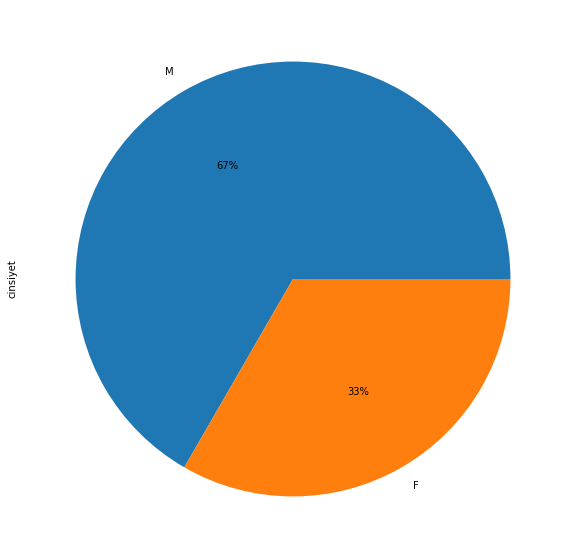

In [49]:
df_actors.cinsiyet.value_counts().plot.pie(autopct='%1.0f%%',figsize=(10, 10))

**7.Yıllara göre kadın erkek aktor dağılımı**

In [50]:
#Birleştireceğim veri setleri içinden ilgili sütunları seçelim.

d1 = df_movies[["film_id","yil"]]
d2 = df_movies2actors[["aktor_id","film_id"  ]]
d3=df_actors[["aktor_id","cinsiyet"]]

#Verileri birleştirme
mergingdf = pd.merge(d1,d2,how='right')
mergingdf=pd.merge(mergingdf,d3,how='right')

#mergingdf 
df=mergingdf.groupby(by=["yil","cinsiyet"]).cinsiyet.agg(["count"])

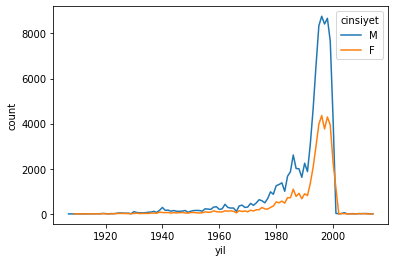

In [51]:
sns.lineplot(x = "yil", y = "count", hue = "cinsiyet", data = df);

**8.En yüksek puan almış 10 film:**

Text(0.5, 1.0, 'Highest Rated Movies')

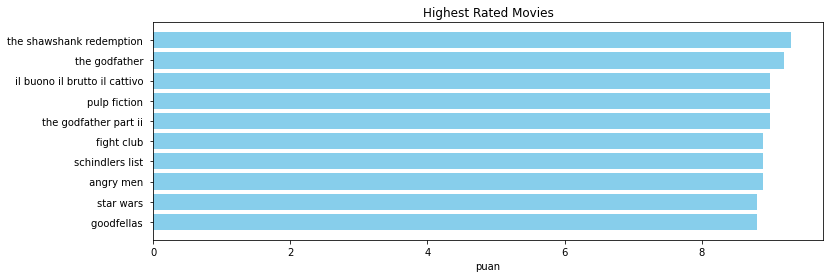

In [52]:
df_moviesmerge=pd.merge(df_movies,df_ratings,on="film_id",how='right')
pop= df_moviesmerge.sort_values('puan', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop['film_ismi'].head(10),pop['puan'].head(10), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("puan")
plt.title("Highest Rated Movies")

*9.En fazla filme sahip şirketler*

*10.Hangi dilde kaç film var:*

In [53]:
#hangi dilde kaç film olduğunu da görelim
df_languages.groupby("dil").dil.agg(["count"]).sort_values("count",ascending=False)
#df_languages.groupby("dil").size()
#df_languages.


,count
dil,
english,3440
french,328
spanish,212
german,162
italian,159
...,...
english onscreen text no dialogue,1
english dubbed,1
polish one scene,1


In [54]:
df_languages[df_languages.dil.str.contains('turkish')].dil.agg(["count"])#turkce dilindeki film sayısı

count    6
Name: dil, dtype: int64

11. ratings heatmap

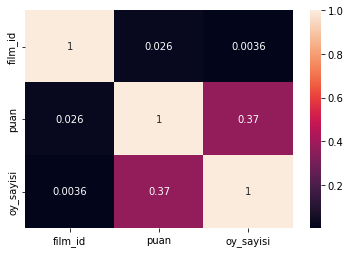

In [55]:
sns.heatmap(df_ratings.corr(), annot = True)

12. movies2actors heatmap

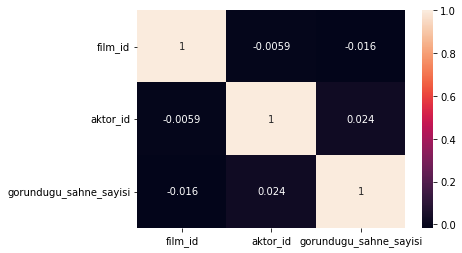

In [56]:
sns.heatmap(df_movies2actors.corr(), annot = True)